In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt

In [3]:
EP = pd.read_csv("EP_data.csv").dropna()

In [4]:
print(EP.columns.names)

[None]


In [5]:
print(EP.head)

<bound method DataFrame.head of        gender  num_groups  num_entries  num_fans  num_friends     created  \
0           F         210           54        25            2  2014-12-20   
1           F          25            9         2            0  2014-08-28   
2           U           0        65535      5672            0  2008-04-21   
3           M         153            2         6            5  2014-12-13   
4           F          29            8        83           60  2014-12-27   
5           M          14            1         2            0  2013-12-13   
6           F        2993           62       353            7  2014-07-18   
7           F          69           26        21            3  2014-05-10   
8           M         250          255         1            0  2014-11-29   
9           F          41           80        37            4  2014-10-31   
10          M         263          104       176            1  2014-04-07   
11          F         167           13      

In [27]:
EP_small = EP.loc[EP['num_friends']>1000,]
cat_name = 'gender'
var_name = 'num_friends'
cates = list(set(EP[cat_name]))
means = list()
for cat in cates:
    means.append(np.mean(EP_small[EP_small[cat_name] == cat][var_name]))

In [28]:

pd.DataFrame([cates,
         means],index=[cat_name,'mean_'+var_name])

,0,1,2,3
gender,U,T,F,M
mean_num_friends,1388.414,1642.228,1957.908,1752.464


In [29]:
fans_lm=ols('num_friends ~ num_entries+num_groups+num_fans+num_logins', data=EP_small).fit()
print(fans_lm)

In [36]:
fans_lm=ols('num_fans ~ C(gender)', data=EP).fit()
print(fans_lm)

In [37]:
pd.DataFrame([fans_lm.params,
          fans_lm.pvalues],index=['mean','p'])

,Intercept,C(gender)[T.M],C(gender)[T.T],C(gender)[T.U]
mean,226.374502,-103.097327,-5.351369e+01,4069.825698
p,0.000000,0.000000,2.033888e-08,0.000000


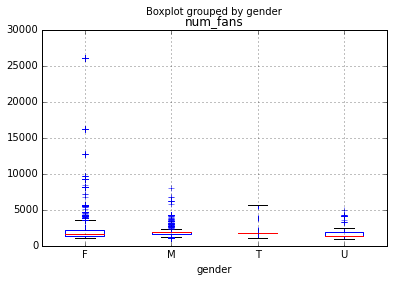

In [38]:
EP_small = EP.loc[EP['num_friends']>1000,]
pd.DataFrame.boxplot(EP_small,'num_fans','gender')

,gender,num_groups,num_entries,num_fans,num_friends,created,last_login,num_logins,last_wall_activity,last_circle_activity,birthdate,gid,content,date_posted,votes,num_comments
0,F,210,54,25,2,2014-12-20,2015-04-03 12:45:01,6,0000-00-00 00:00:00,0000-00-00 00:00:00,1997-03-31,124249,I just want my mom to hug me and say that she ...,2015-01-01 00:00:10,0,0
1,F,25,9,2,0,2014-08-28,2015-04-15 22:32:36,19,0000-00-00 00:00:00,0000-00-00 00:00:00,1994-03-31,5276,I don't know why this is happening right now. ...,2015-01-01 00:00:46,0,0
2,U,0,65535,5672,0,2008-04-21,2012-11-13 18:03:23,5,2009-03-27 21:22:12,0000-00-00 00:00:00,1989-03-09,49025,I accept the wisdom of all religions and disca...,2015-01-01 00:00:49,10,1
3,M,153,2,6,5,2014-12-13,2015-06-01 20:34:52,15,0000-00-00 00:00:00,2014-12-13 08:37:11,1993-11-30,58852,HAPPY NEW YEARS !!!!!!!!!!!!!!! !!!!!!!!!...,2015-01-01 00:02:39,1,2
4,F,29,8,83,60,2014-12-27,2015-05-14 13:25:09,19,0000-00-00 00:00:00,2015-05-14 13:25:34,1977-08-31,970365,Showing now if anyone is interested...message ...,2015-01-01 00:02:45,0,0
5,M,14,1,2,0,2013-12-13,2015-01-07 01:57:45,1,0000-00-00 00:00:00,0000-00-00 00:00:00,1990-10-31,262541,I am in love with this beautiful girl.....<br ...,2015-01-01 00:03:01,10,9
6,F,2993,62,353,7,2014-07-18,2015-07-09 06:55:52,43,2015-03-19 17:28:56,2015-03-12 17:44:25,1996-01-31,261634,My birthday is in a few weeks 18 days everyone...,2015-01-01 00:04:52,3,5
7,F,69,26,21,3,2014-05-10,2015-01-04 21:53:13,1,0000-00-00 00:00:00,0000-00-00 00:00:00,1999-01-31,88442,I just love doctor who ok doctor who is my lif...,2015-01-01 00:05:02,0,0
8,M,250,255,1,0,2014-11-29,2015-03-25 09:23:41,1127,0000-00-00 00:00:00,0000-00-00 00:00:00,1982-11-30,962002,"Be of good character, should have an eighth gr...",2015-01-01 00:06:00,0,1
9,F,41,80,37,4,2014-10-31,2015-05-19 06:28:05,3,0000-00-00 00:00:00,0000-00-00 00:00:00,1995-02-28,368043,I struggle so hard when I put things on shelve...,2015-01-01 00:06:58,6,4


In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.boxplot(EP['num_friends'])

In [ ]:
plt.show()